#### Importing all required python library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
%matplotlib inline

#### pt is path of dataset which is located on your labtop

In [4]:
pt = r"C:\Users\chandan\Downloads\data.csv"
pt

'C:\\Users\\chandan\\Downloads\\data.csv'

#### Let's load data and stored df pandas dataframe

In [5]:
df = pd.read_csv(pt, names = ['col1', 'col2'])

#### let's see how our data look like top 5 rows

In [6]:
df.head()

,col1,col2
0,-0.666176,1.124497
1,-0.575134,0.323926
2,-0.709830,0.449826
3,-0.424223,0.697510
4,-0.856591,0.327999


#### shape and data tyeps of each columns info

In [7]:
df.shape

(4000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    4000 non-null   float64
 1   col2    4000 non-null   float64
dtypes: float64(2)
memory usage: 62.6 KB


#### check for dublicated data points ( rows in df DataFrame )

In [9]:
df.duplicated().sum()

0

#### No! There is no missing values in my DataFrame df, so it's again fine

#### let's check any missing values or not

In [10]:
df.isnull().sum()

col1    0
col2    0
dtype: int64

#### greate there are no any missing rows

## Tasks

### You have to perform the following tasks using the given data.

In [11]:
sns.set_style(style='darkgrid')

### Q1.) Plot the given data points on the console in order to visualize it. Your code must reproduce the plots on re-running it. [2]

<AxesSubplot:xlabel='col1', ylabel='col2'>

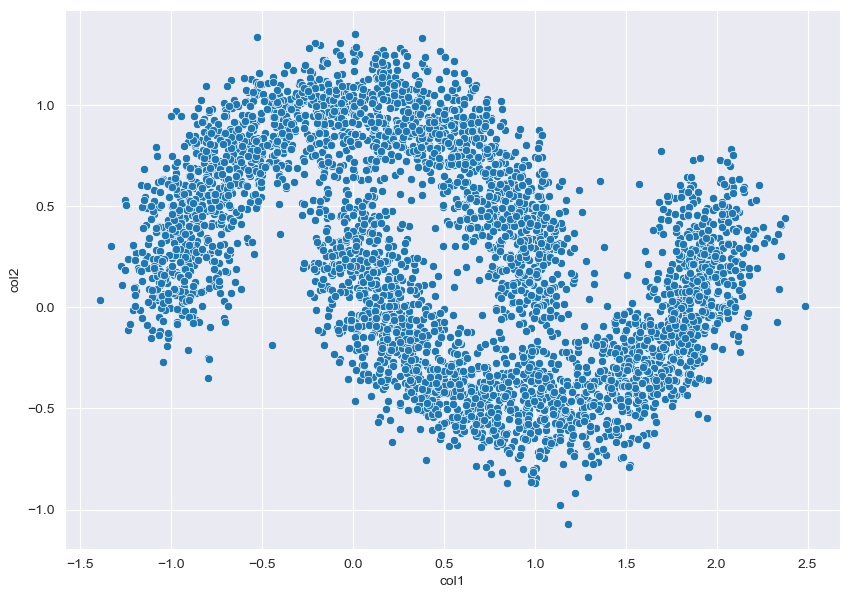

In [12]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'col1', y = 'col2', data = df)

### Q2.) Develop and then implement an effective unsupervised method/framework that can perfectly find the natural clusters of the given data set. Assume number of clusters is 2. You must explore the performance of different relevant feature engineering and clustering techniques in order to achieve this. [6]

### Let's Apply K-Means

#### As given question number of clusters is 2
#### Let's applyed unsupervised machine learning to train data

In [13]:
km = KMeans(n_clusters=2)
km.fit(df[['col1', 'col2']])

KMeans(n_clusters=2)

#### km.labels_ give all data points group like row1 group 1, row2 group 0 

In [14]:
km.labels_

array([0, 0, 0, ..., 1, 1, 0])

#### After divided all data points into group 1 and 0
#### let's draw scatter point to show how groups look like

<AxesSubplot:xlabel='col1', ylabel='col2'>

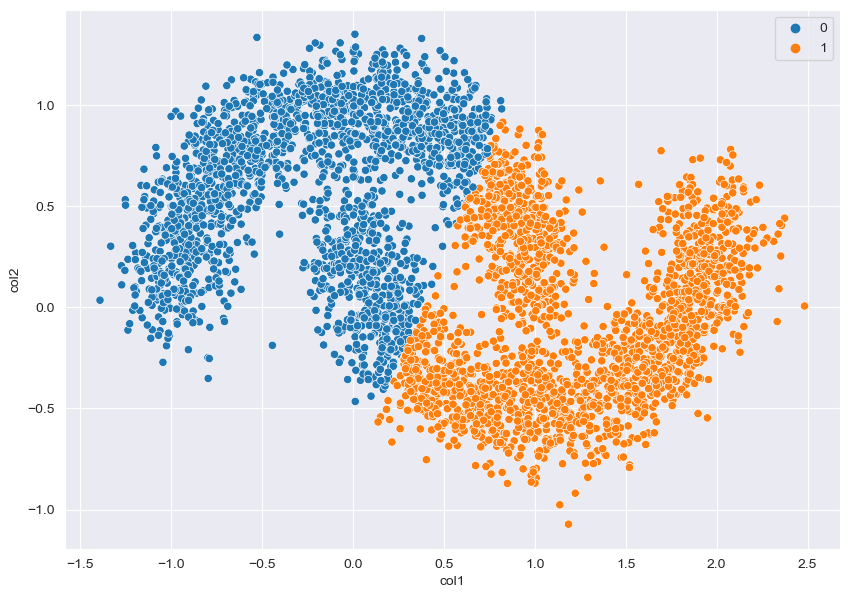

In [15]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'col1', y = 'col2', hue = km.labels_, data = df)

### Let's Apply Hierarchical Clustering

#### Given number of cluster = 2
#### As given question number of clusters is 2
#### Let's applyed unsupervised machine learning to train data

In [16]:
hcl = AgglomerativeClustering(n_clusters=2)
hcl.fit(df[['col1','col2']])

AgglomerativeClustering()

#### hcl.labels_ give all data points group like row1 group 1, row2 group 0

In [17]:
hcl.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

#### After divided all data points into group 1 and 0
#### let's draw scatter point to show how groups look like

<AxesSubplot:xlabel='col1', ylabel='col2'>

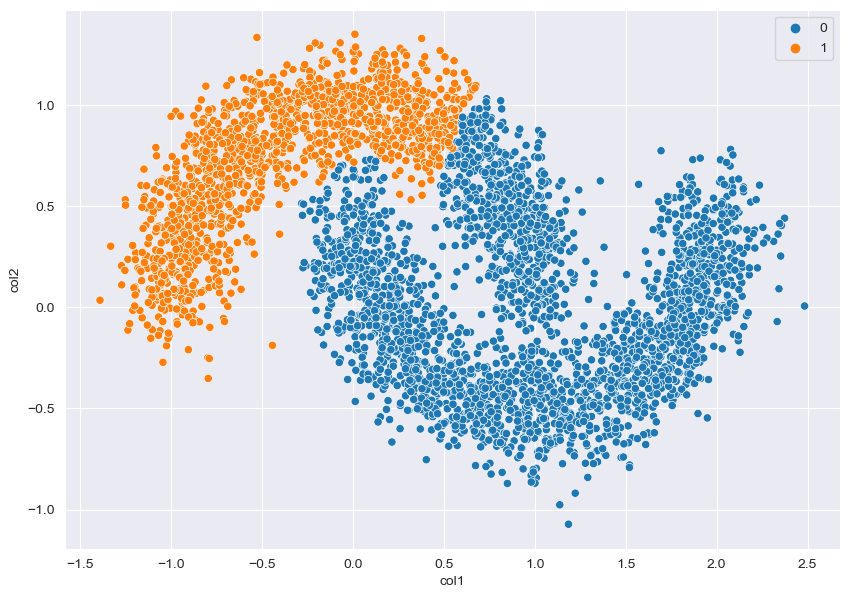

In [18]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'col1', y = 'col2', hue = hcl.labels_, data = df)

### Note : You can see here both K-Means and Hierarchical Clustering Un-Supervised Machine learning algorithms are distance based due to that reason complex merged or noise groups of data can not be clustered by this distance based unsupervised ML algo

## So here coming Density based un-supervised machine learning algorithm DBSCAN

### Let's Apply DBSCAN Clustering

#### let's create DBSCAN default ML algo object and let's train

In [19]:
dbscan=DBSCAN()
dbscan.fit(df[['col1','col2']])

DBSCAN()

#### dbscan.labels_ give all data points group label values

In [20]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### After divided all data points into groups
#### let's draw scatter point to show how groups look like

<AxesSubplot:xlabel='col1', ylabel='col2'>

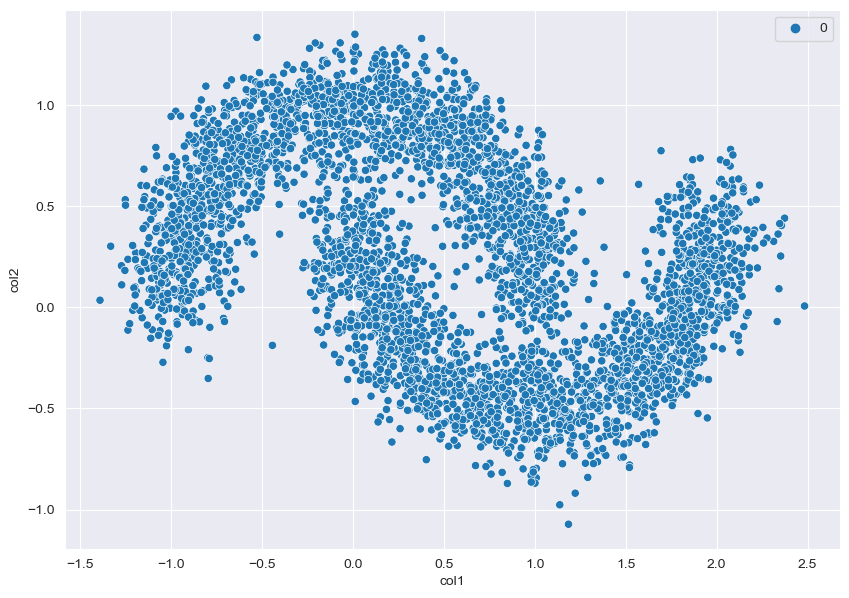

In [21]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'col1', y = 'col2', hue = dbscan.labels_, data = df)

#### Here you can see easily there is only one group coluter according to our DBSCAN Algo
#### But we need to divided into 2 cluster of groups then we need to compute hyper parameter tuning

#### NearestNeighbors Algorithm give me proper radius ( epsilon ) vlaue that we will use in DBSCAN

In [22]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['col1','col2']])
distances, indices = nbrs.kneighbors(df[['col1','col2']])

In [23]:
nbrs.kneighbors(df[['col1','col2']])[1].shape

(4000, 2)

In [24]:
df.shape

(4000, 2)

#### let's show via graph to all epsilon ( radius value ) 

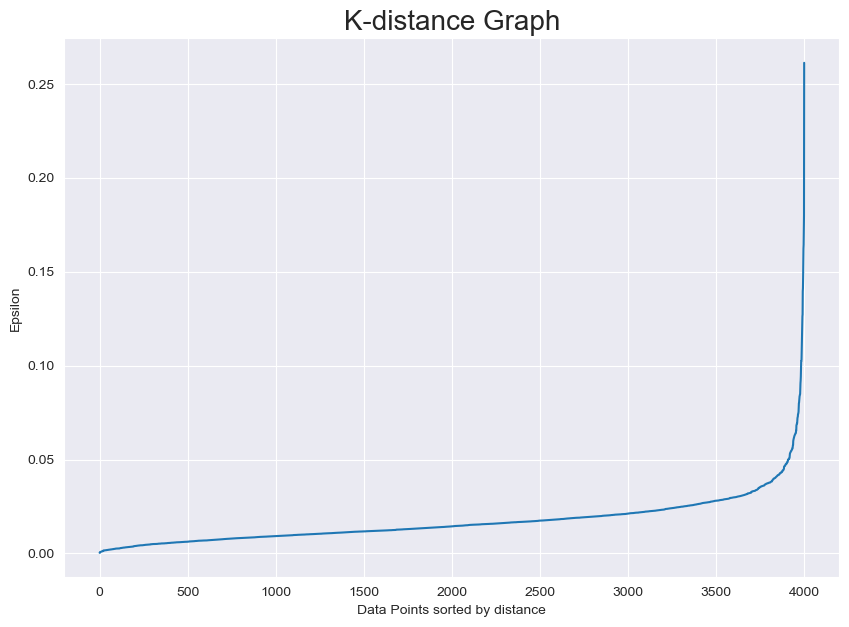

In [25]:
# Plotting K-distance Graph
plt.figure(figsize=(10,7))
plt.plot(sorted(distances[:,1]))
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

#### Now here we can see radius after 0.10 number of distance have constant, then we will choose epsilon value = 0.1 

#### one another hepyer parameter we need to find how many min_samples which number of neighbouring points required for a point to be considered as a dense region, or a valid cluster

In [26]:
for min_sam in range(5, 50) : 
    dbscan_opt=DBSCAN(eps=0.1,min_samples=min_sam)
    dbscan_opt.fit(df[['col1','col2']])
    print(f"min_sam : {min_sam}")
    print(pd.DataFrame(dbscan_opt.labels_, columns = ['label'])['label'].value_counts())
    print()
    # print(min_sam)

min_sam : 5
 0    3970
-1      30
Name: label, dtype: int64

min_sam : 6
 0    3966
-1      34
Name: label, dtype: int64

min_sam : 7
 0    3963
-1      37
Name: label, dtype: int64

min_sam : 8
 0    3957
-1      43
Name: label, dtype: int64

min_sam : 9
 0    3946
-1      54
Name: label, dtype: int64

min_sam : 10
 0    3940
-1      60
Name: label, dtype: int64

min_sam : 11
 0    3933
-1      67
Name: label, dtype: int64

min_sam : 12
 0    3920
-1      80
Name: label, dtype: int64

min_sam : 13
 0    3910
-1      90
Name: label, dtype: int64

min_sam : 14
 0    3897
-1     103
Name: label, dtype: int64

min_sam : 15
 0    3888
-1     112
Name: label, dtype: int64

min_sam : 16
 0    3879
-1     121
Name: label, dtype: int64

min_sam : 17
 0    3860
-1     140
Name: label, dtype: int64

min_sam : 18
 0    1949
 1    1902
-1     149
Name: label, dtype: int64

min_sam : 19
 0    1941
 1    1894
-1     165
Name: label, dtype: int64

min_sam : 20
 0    1933
 1    1881
-1     186
Name: l

#### Here we can see that min_samples = 18 in which our algorithm is capable to cluster into three part, -1 -> noise data and 0, 1 is for proper groups 

#### let's again train dbscan = epsilon eps = 0.1 and min_samples = 18

In [27]:
dbscan_opt=DBSCAN(eps=0.1,min_samples=18)
dbscan_opt.fit(df[['col1','col2']])

DBSCAN(eps=0.1, min_samples=18)

#### dbscan_opt.labels_ give all data points group label values

In [28]:
dbscan_opt.labels_

array([ 0, -1,  0, ...,  1,  1, -1], dtype=int64)

In [29]:
print(pd.DataFrame(dbscan_opt.labels_, columns = ['label'])['label'].value_counts())

 0    1949
 1    1902
-1     149
Name: label, dtype: int64


#### After divided all data points into groups
#### let's draw scatter point to show how groups look like

<AxesSubplot:xlabel='col1', ylabel='col2'>

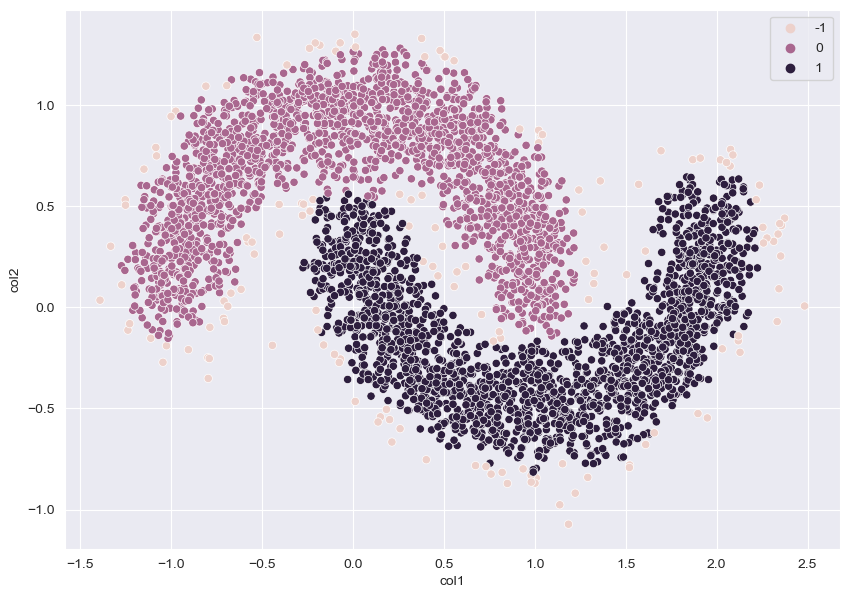

In [30]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'col1', y = 'col2', hue = dbscan_opt.labels_, data = df)

### Q3.) Submit the predicted cluster labels (by the method/framework developed) of the given data points in a text file. The performance of your model will be evaluated in terms of normalized mutual information following this library, but you cannot test it before the deadline. Your code must reproduce the cluster labels which will be uploaded. [2]

In [31]:
dbscan_opt.labels_

array([ 0, -1,  0, ...,  1,  1, -1], dtype=int64)

In [32]:
# with open('submission.txt', 'w') as fn : 
#     fn.write(()
pd.DataFrame(dbscan_opt.labels_, columns = ['label']).to_csv('submission.csv', index = False)

In [33]:
pd.DataFrame(dbscan_opt.labels_, columns = ['label']).to_csv('submission.txt', index = False)